In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a constelação 4-QAM padrão
default_symbols_constellation = np.array([1+1j, 1-1j, -1+1j, -1-1j])
default_bits_to_symbols = {
    (0, 0): 1+1j,
    (0, 1): 1-1j,
    (1, 0): -1-1j,
    (1, 1): -1+1j
}
default_symbols_to_bits = {v: k for k, v in default_bits_to_symbols.items()}

M = 4
k = np.log2(M)
snr_db_range = np.arange(0, 11, 0.5)
symbol_sequence_length = int(1e6)

def bits_to_signal(bits, bits_to_symbols):
    """Mapeia uma sequência de bits para uma sequência de símbolos 4-QAM."""
    symbols = [bits_to_symbols[tuple(bits[i:i+2])] for i in range(0, len(bits), 2)]
    return np.array(symbols)

def signal_to_bits(signal, symbols_to_bits):
    """Mapeia uma sequência de símbolos 4-QAM para uma sequência de bits."""
    bits = []
    for symbol in signal:
        bits.extend(symbols_to_bits[symbol])
    return np.array(bits)

def simulate_ber_4qam(snr_db_range, symbol_sequence_length, bits_to_symbols, symbols_to_bits):
    """Simulate 4-QAM modulation in an AWGN channel and compute BER for each SNR using Monte Carlo simulations."""
    ser = []
    for snr_db in snr_db_range:
        
        snr_linear = 10**(snr_db / 10.0)
        snr_symbol = snr_linear * k
        
        energy_symbol = np.mean(np.abs(list(bits_to_symbols.values()))**2)
        sigma = np.sqrt(energy_symbol/(2*snr_symbol))
        noise = sigma * (np.random.randn(symbol_sequence_length) + 1j * np.random.randn(symbol_sequence_length))
        
        # Gera uma sequência aleatória de bits
        bits = np.random.randint(0, 2, int(symbol_sequence_length * k))
        
        # Mapeia bits para símbolos
        signal = bits_to_signal(bits, bits_to_symbols)
        
        # Adiciona ruído AWGN
        signal_with_noise = signal + noise
        
        # Demodulação e decisão
        signal_demod = []
        for symbol in signal_with_noise:
            distances = np.abs(symbol - np.array(list(bits_to_symbols.values())))
            demod_symbol = list(bits_to_symbols.values())[np.argmin(distances)]
            signal_demod.append(demod_symbol)
        signal_demod = np.array(signal_demod)
        
        # Mapeia símbolos demodulados para bits
        bits_demod = signal_to_bits(signal_demod, symbols_to_bits)
        
        # Calcula o número de bits errados
        num_errors = np.sum(bits != bits_demod)
        
        ser.append(num_errors / len(bits))
    
    return ser

# Testar com mapeamento padrão
simulated_ber_default = simulate_ber_4qam(snr_db_range, symbol_sequence_length, default_bits_to_symbols, default_symbols_to_bits)

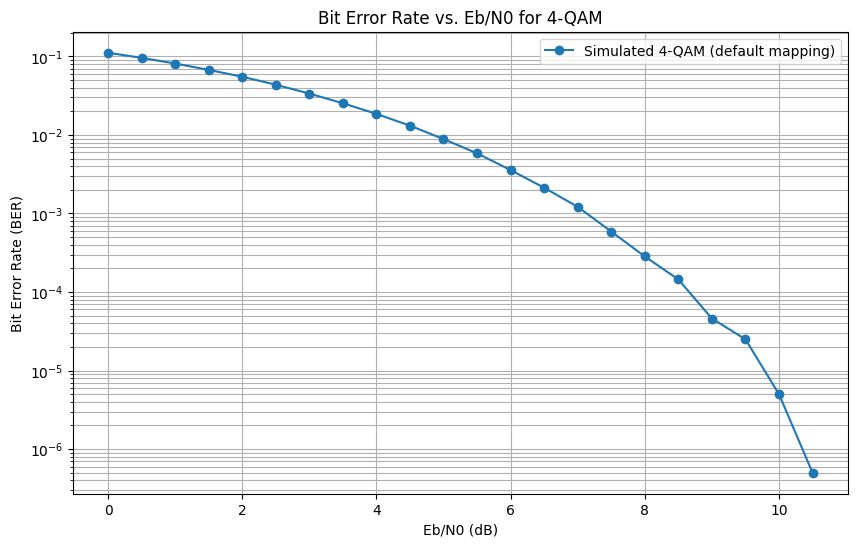

In [26]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, simulated_ber_default, 'o-', label='Simulated 4-QAM (default mapping)')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('Bit Error Rate vs. Eb/N0 for 4-QAM')
plt.legend()
plt.show()

In [27]:
# Novo mapeamento de bits para símbolos
new_bits_to_symbols = {
    (0, 0): 1+1j,
    (0, 1): 1-1j,
    (1, 0): -1+1j,
    (1, 1): -1-1j
}
new_symbols_to_bits = {v: k for k, v in new_bits_to_symbols.items()}

# Testar com novo mapeamento
simulated_ber_new = simulate_ber_4qam(snr_db_range, symbol_sequence_length, new_bits_to_symbols, new_symbols_to_bits)

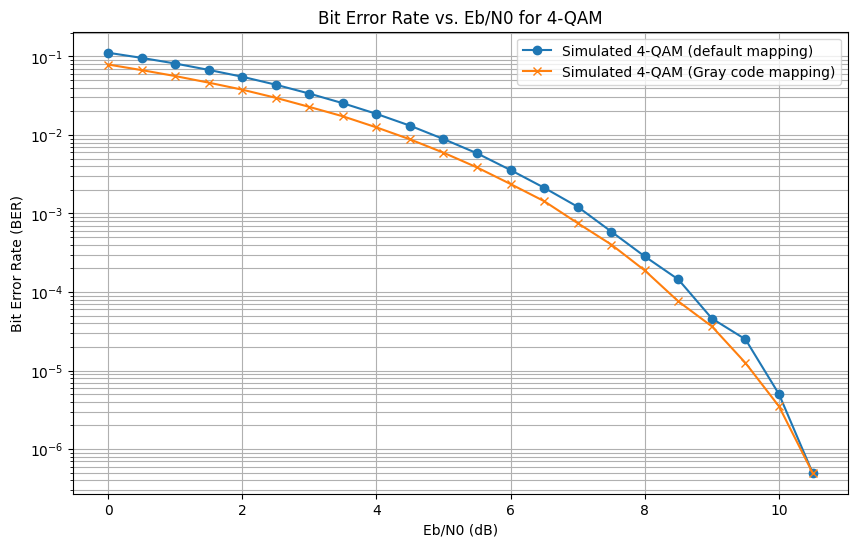

In [29]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, simulated_ber_default, 'o-', label='Simulated 4-QAM (default mapping)')
plt.semilogy(snr_db_range, simulated_ber_new, 'x-', label='Simulated 4-QAM (Gray code mapping)')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('Bit Error Rate vs. Eb/N0 for 4-QAM')
plt.legend()
plt.show()
